The different libraries found within the different labs.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix, roc_curve, auc

from sklearn import discriminant_analysis as da
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, accuracy_score

from scipy.special import expit
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/Global YouTube Statistics.csv'
df = pd.read_csv(path, encoding='latin1')
df

Mounted at /content/drive


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


Data Preparation Measures:

In [ ]:
#The first thing is to get rid of any 0 uploading values because they will mess up the data. The reason these value will mess up the prediction as 0 uploads should = 0 views. However, this is not the case because YT makes their own accounts that are considered channels but do not actuallly post.

df['video views'] = df['video views'].replace(0, np.nan)
df = df.dropna(subset=['video views'])

df['subscribers'] = df['subscribers'].replace(0, np.nan)
df = df.dropna(subset=['subscribers'])

#the second thing we did was remove all values that did not meet the 50 threshold. The reasoning for this threshold is because we want to make sure that viral videos are not being counted in our data because it would ruin the accuracy of our findings.
lower_bound_uploads = 50

df = df[df['uploads'] >= lower_bound_uploads]

#the third thing we do is get rid of all the channel_type rows that are the music genre because this will eliminate a lot of the music artist people and music companies such as vevo, T-Series, etc.
df = df[df['channel_type'] != 'Music']




df

<ipython-input-5-f94f8d394e7b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['subscribers'] = df['subscribers'].replace(0, np.nan)


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,Migos ATL,12400000,6.993406e+09,Music,Migos ATL,99,United States,US,Entertainment,...,100000.0,2012.0,Jan,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973


Continuation of data preparations is to find the outliers and remove them from the data set. I will find the outliers using data visualization of bar charts and performing quartile checks.


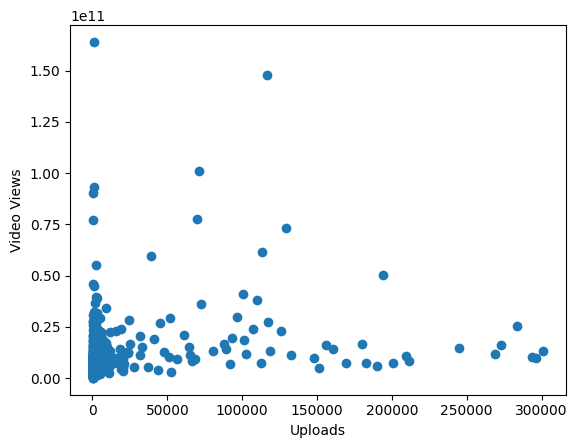

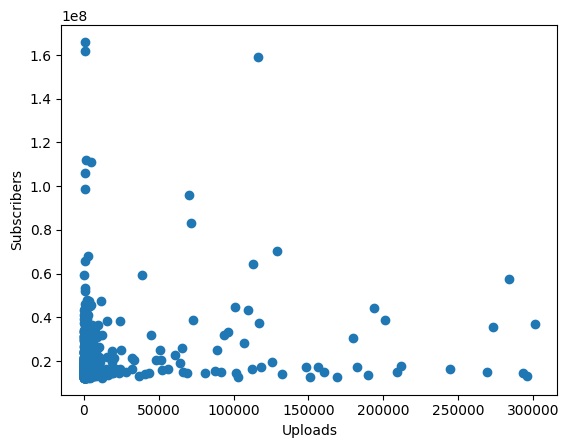

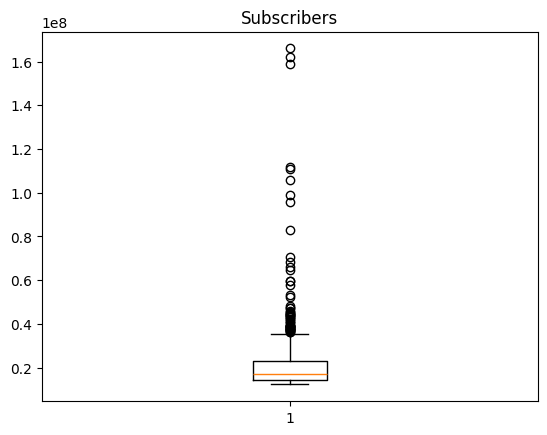

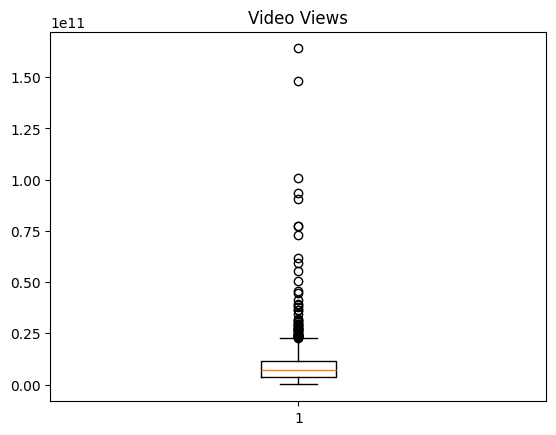

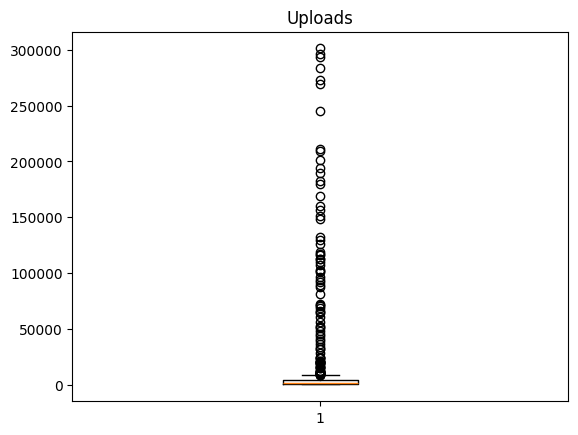

In [ ]:
plt.scatter(df['uploads'], df['video views'])
plt.xlabel('Uploads')
plt.ylabel('Video Views')
plt.show()

plt.scatter(df['uploads'], df['subscribers'])
plt.xlabel('Uploads')
plt.ylabel('Subscribers')
plt.show()

plt.boxplot(df['subscribers'])
plt.title('Subscribers')
plt.show()

plt.boxplot(df['video views'])
plt.title('Video Views')
plt.show()

plt.boxplot(df['uploads'])
plt.title('Uploads')
plt.show()


Normalizing the data due to skew using log transformation

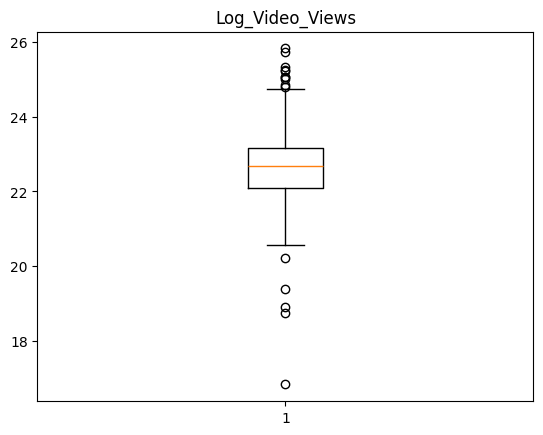

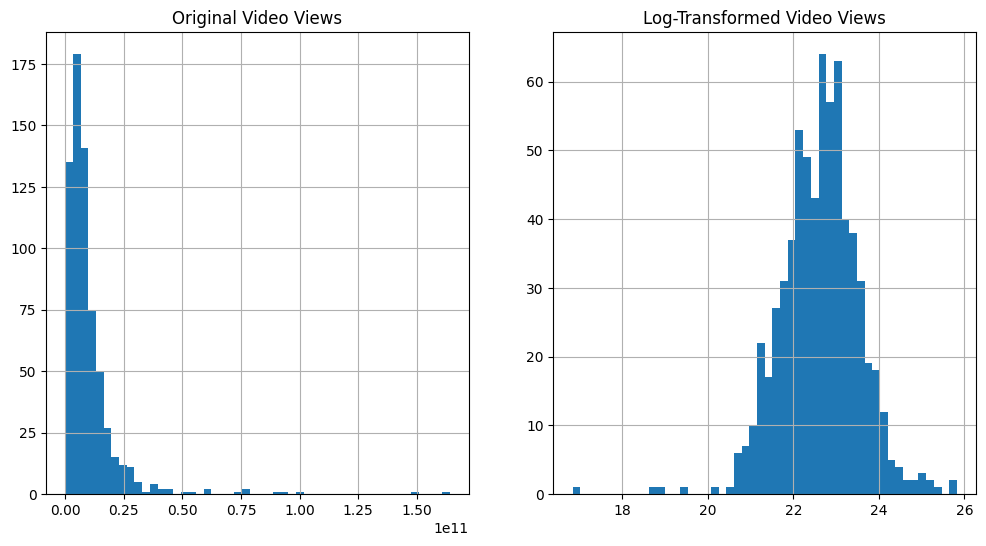

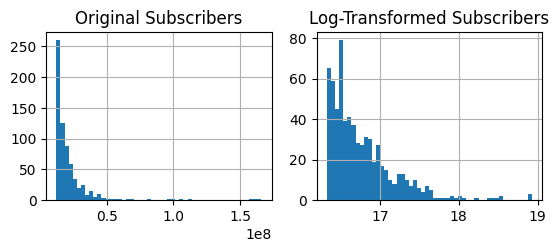

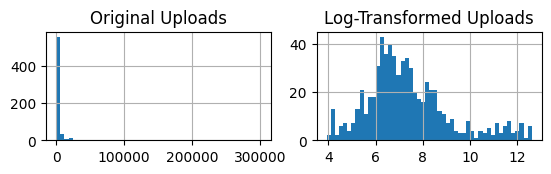

In [ ]:
df['log_uploads'] = np.log1p(df['uploads'])
df['log_video_views'] = np.log1p(df['video views'])
df['log_subscribers'] = np.log1p(df['subscribers'])

plt.boxplot(df['log_video_views'])
plt.title('Log_Video_Views')
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df['video views'].hist(bins=50)
plt.title("Original Video Views")

plt.subplot(1, 2, 2)
df['log_video_views'].hist(bins=50)
plt.title("Log-Transformed Video Views")

plt.show()

plt.subplot(2, 2, 1)
df['subscribers'].hist(bins=50)
plt.title("Original Subscribers")

plt.subplot(2, 2, 2)
df['log_subscribers'].hist(bins=50)
plt.title("Log-Transformed Subscribers")

plt.show()

plt.subplot(3, 2, 1)
df['uploads'].hist(bins=50)
plt.title("Original Uploads")

plt.subplot(3, 2, 2)
df['log_uploads'].hist(bins=50)
plt.title("Log-Transformed Uploads")

plt.show()



Getting rid of all of those outliers in the data using the IQR method of removing outliers based on views.

In [ ]:
q1 = df['log_video_views'].quantile(0.25)
q3 = df['log_video_views'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

displaying the values of the q1, q3, lower bound, and upper bound. The lower and upper bound values are crucial in removing those outliers from our data.

In [ ]:
q1, q3, iqr, lower_bound, upper_bound

(22.08586130236737,
 23.163834329956458,
 1.0779730275890884,
 20.468901760983737,
 24.78079387134009)

The values that are not in the range of the lower and upper bound can be considered outliers. This next step is to list out the different outliers in our data.

In [ ]:
df.loc[(df['log_video_views'] < lower_bound) | (df['log_video_views'] > upper_bound), 'log_video_views']


,log_video_views
3,25.823132
4,25.720478
6,25.258518
8,25.228384
9,25.069408
11,25.072620
15,25.338386
21,25.015628
26,24.842480
29,24.806153


This step is to remove the outliers from our data so that our data becomes more accurate.

In [ ]:
df = df.loc[(df['log_video_views'] >= lower_bound) & (df['log_video_views'] <= upper_bound)]
df


,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,log_uploads,log_video_views,log_subscribers
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,6.609349,24.068557,18.927498
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924,8.458928,24.092561,18.525041
22,23,Pinkfong Baby Shark - Kids' Songs & Stories,68200000,3.884323e+10,Education,Pinkfong Baby Shark - Kids' Songs & Stories,2865,United States,US,Education,...,14.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,7.960673,24.382800,18.037955
24,25,ChuChu TV Nursery Rhymes & Kids Songs,65900000,4.575785e+10,Education,ChuChu TV Nursery Rhymes & Kids Songs,633,India,IN,Education,...,9.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,6.452049,24.546629,18.003649
28,29,Dude Perfect,59500000,1.624155e+10,Sports,Dude Perfect,389,United States,US,Sports,...,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,5.966147,23.510839,17.901487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,Migos ATL,12400000,6.993406e+09,Music,Migos ATL,99,United States,US,Entertainment,...,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,4.605170,22.668234,16.333207
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280,7.090910,22.923775,16.325110
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,7.313887,21.238727,16.325110
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973,7.805067,21.518376,16.325110


This is to check the botplot now to make sure the data has been changed without those outliers.

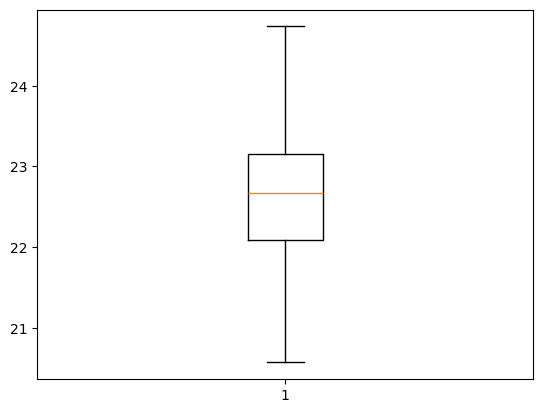

In [ ]:
plt.boxplot(df['log_video_views'])
plt.show()

Repeat for subscribers

16.468752592994022 16.897420573630875 0.4286679806368525 15.825750622038743 17.540422544586153


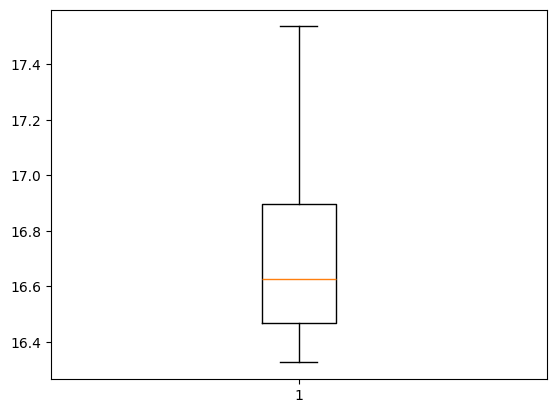

In [ ]:
q1 = df['log_subscribers'].quantile(0.25)
q3 = df['log_subscribers'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(q1, q3, iqr, lower_bound, upper_bound)

df = df.loc[(df['log_subscribers'] >= lower_bound) & (df['log_subscribers'] <= upper_bound)]

plt.boxplot(df['log_subscribers'])
plt.show()


Part 2: Data Exploration

In [ ]:
# Descriptive Statistics
df_stats = df[['log_subscribers', 'log_uploads', 'log_video_views']].describe()
print(df_stats)

# Key Points
# Uploads has a high standard deviation, showing how we did not remove outliers from it compared to video views and subscribers.
# Ranges: Upload has a large range (~8.7) compared to video views (~4.15) and subscribers (~1.17).
# This demonstrates the effectiveness of the log transformation.

       log_subscribers  log_uploads  log_video_views
count       633.000000   633.000000       633.000000
mean         16.708724     7.340574        22.567860
std           0.303200     1.728664         0.771051
min          16.325110     3.931826        20.569795
25%          16.468753     6.236370        22.065584
50%          16.624913     7.081709        22.635244
75%          16.897421     8.220672        23.085412
max          17.536373    12.615892        24.736036


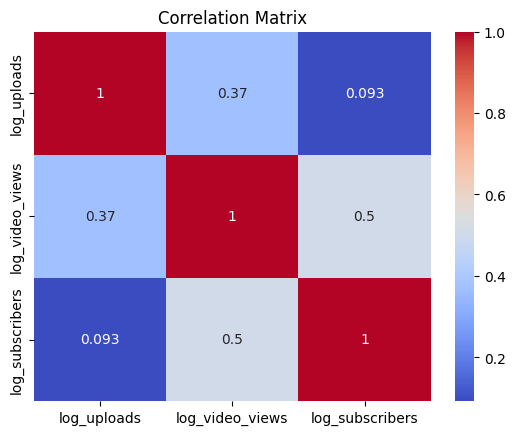

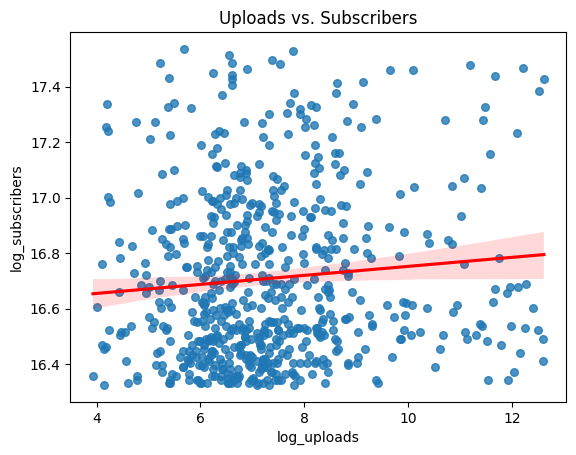

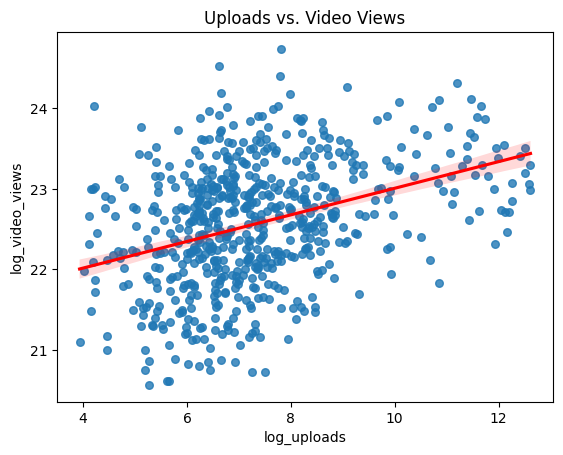

In [ ]:
# Correlation Matrix
sns.heatmap(df[['log_uploads', 'log_video_views', 'log_subscribers']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Supporting scatter plots
sns.regplot(x='log_uploads', y='log_subscribers', data=df, scatter_kws={'s': 30}, line_kws={'color': 'red'})

plt.title("Uploads vs. Subscribers")
plt.show()

sns.regplot(x='log_uploads', y='log_video_views', data=df, scatter_kws={'s': 30}, line_kws={'color': 'red'})

plt.title("Uploads vs. Video Views")
plt.show()

bee swarm graph to show the spread of the graph.

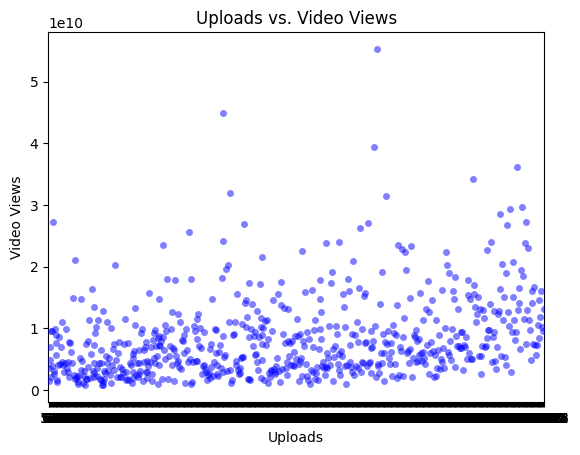

In [ ]:
sp = sns.stripplot(x='uploads', y='video views', data=df, color='blue', alpha=0.5)
plt.title("Uploads vs. Video Views")
plt.xlabel("Uploads")
plt.ylabel("Video Views")
plt.show()


Part 3: Data Modeling

Linear Regression MSE:
Views: 0.5275498661905311
Subscribers: 0.10215178872596449


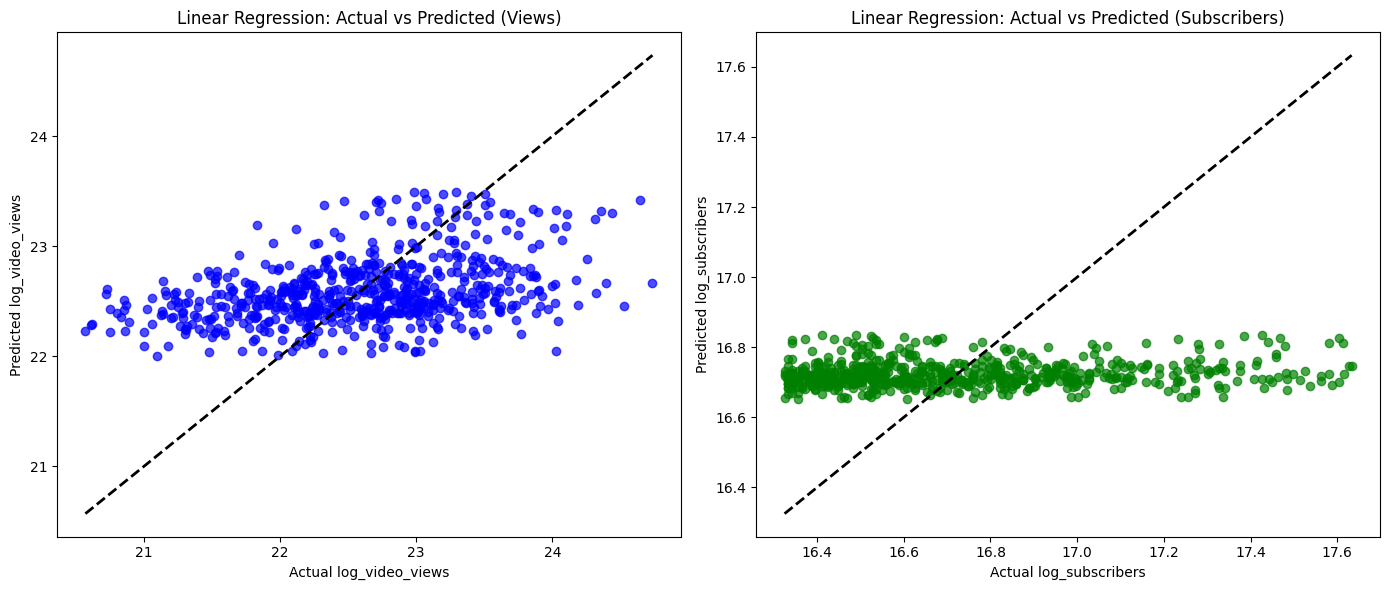

In [ ]:
# Regression Model
X = df[['log_uploads']]
y_views = df['log_video_views']
y_subscribers = df['log_subscribers']

model_views = linear_model.LinearRegression().fit(X, y_views)
model_subscribers = linear_model.LinearRegression().fit(X, y_subscribers)

y_views_pred = model_views.predict(X)
y_subscribers_pred = model_subscribers.predict(X)

mse_views = mean_squared_error(y_views, y_views_pred)
mse_subscribers = mean_squared_error(y_subscribers, y_subscribers_pred)

print("Linear Regression MSE:")
print(f"Views: {mse_views}")
print(f"Subscribers: {mse_subscribers}")

plt.figure(figsize=(14, 6))

# Views
plt.subplot(1, 2, 1)
plt.scatter(y_views, y_views_pred, alpha=0.7, color='blue')
plt.plot([y_views.min(), y_views.max()], [y_views.min(), y_views.max()], 'k--', lw=2)
plt.title('Linear Regression: Actual vs Predicted (Views)')
plt.xlabel('Actual log_video_views')
plt.ylabel('Predicted log_video_views')

# Subscribers
plt.subplot(1, 2, 2)
plt.scatter(y_subscribers, y_subscribers_pred, alpha=0.7, color='green')
plt.plot([y_subscribers.min(), y_subscribers.max()], [y_subscribers.min(), y_subscribers.max()], 'k--', lw=2)
plt.title('Linear Regression: Actual vs Predicted (Subscribers)')
plt.xlabel('Actual log_subscribers')
plt.ylabel('Predicted log_subscribers')

plt.tight_layout()
plt.show()

Linear Regression was effective in predicting continuous outcomes like log_video_views and log_subscribers. Its simplicity and interpretability, notably through its coefficients, make it useful in determining feature significance. However, it requires a linear connection between predictors and targets, which may not be true for complicated datasets, and it is susceptible to outliers. Its performance was assessed using Mean Squared Error (MSE), which provides a quantitative indicator of prediction error. Linear Regression performed effectively on this dataset since the connection between characteristics and targets was relatively linear.

kNN Accuracy: 0.5412371134020618


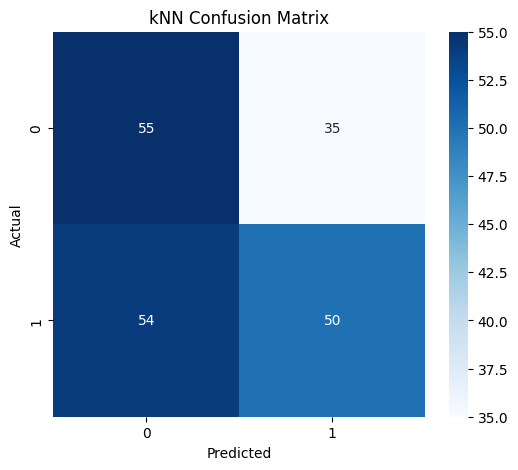

In [ ]:
#kNN Model
median_views = y_views.median()
y_views_binary = (y_views > median_views).astype(int)

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y_views_binary, test_size=0.3, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_knn, y_train_knn)

y_pred_knn = knn_model.predict(X_test_knn)
knn_accuracy = accuracy_score(y_test_knn, y_pred_knn)

print(f"kNN Accuracy: {knn_accuracy}")

conf_matrix = confusion_matrix(y_test_knn, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('kNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The kNN model is a straightforward and clear non-parametric classification tool that can describe complicated connections without assuming a specific data distribution. On the other hand, it is sensitive to the choice of k and feature scaling, potentially costly for big datasets, and has difficulty with unbalanced data. While kNN performed well when patterns in the data were well separated, its performance could be impacted if the data is messy or the feature scaling is incorrect. Optimizing the number of neighbors and preparing the data are critical to increasing its efficiency.


Logistic Regression Accuracy: 0.5824742268041238


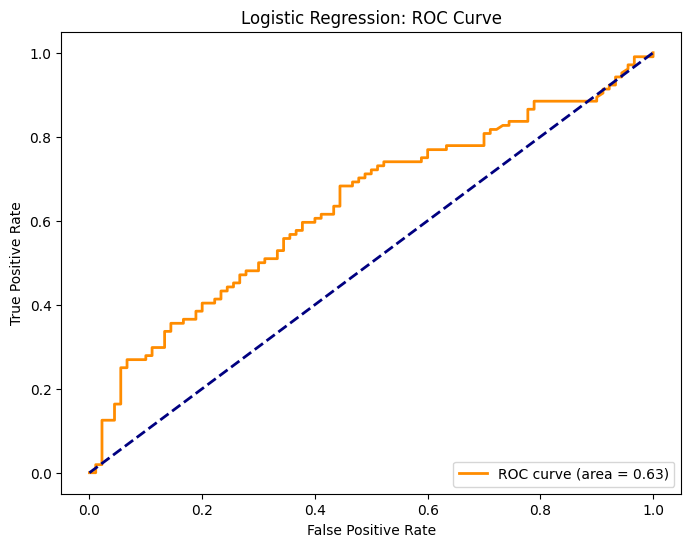

In [ ]:
#Logistic Model
X_train_log, X_test_log, y_train_log, y_test_log = X_train_knn, X_test_knn, y_train_knn, y_test_knn

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_log, y_train_log)

y_pred_log = logistic_model.predict(X_test_log)
logistic_accuracy = accuracy_score(y_test_log, y_pred_log)

print(f"Logistic Regression Accuracy: {logistic_accuracy}")

fpr, tpr, thresholds = roc_curve(y_test_log, logistic_model.predict_proba(X_test_log)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Logistic Regression: ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

Logistic Regression is ideal for binary classification issues because it provides probabilities that allow for variable decision thresholds. It is efficient, interpretable, and helpful for datasets having linear relationships between attributes and the target's the logarithmic likelihood. However, it may fail to detect complicated non-linear patterns. Its performance was assessed using the ROC AUC score, which provides a reliable measure of classification usefulness. Logistic Regression worked well when the binary classification aim was explicitly specified, owing to its simplicity and interpretability.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Model Accuracy: 0.918918918918919

Classification Report:
               precision    recall  f1-score   support

       False       0.92      1.00      0.96       102
        True       0.00      0.00      0.00         9

    accuracy                           0.92       111
   macro avg       0.46      0.50      0.48       111
weighted avg       0.84      0.92      0.88       111



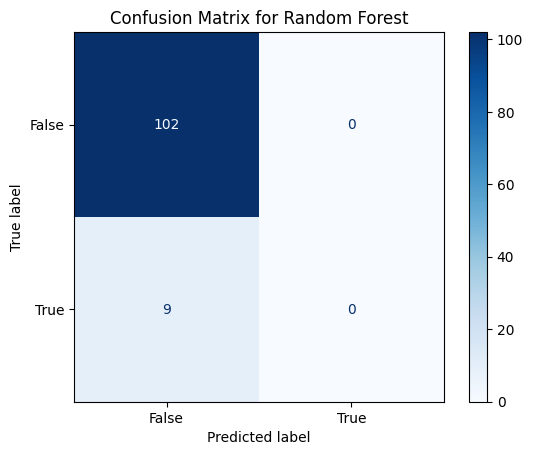

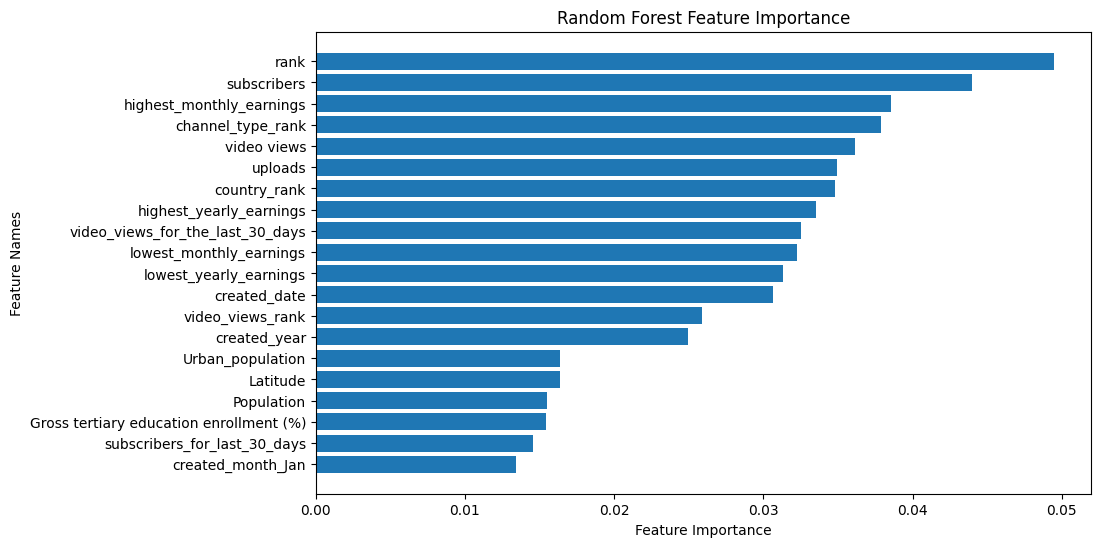

In [ ]:
# Random Forest Model

# Dropping rows with missing values to make sure we only work with complete data
df = df.dropna()

# Here we convert any non-numerical data into numbers so the model can understand it
# For example, if there's a "Yes/No" column, it might become "1/0"
data_encoded = pd.get_dummies(df, drop_first=True)

# The "target_column" is the thing we want to predict
# We use all the other columns as clues to help make that prediction
target_column = data_encoded.columns[-1] # Assuming the target is the last column
X = data_encoded.drop(columns=[target_column]) # Everything except the target
y = data_encoded[target_column] # The target itself

# Keep 80% of the data for training (teaching the model) and 20% for testing (seeing how well it learned)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_forest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")

# Where the model learns from the training data
random_forest.fit(X_train, y_train)

# Now we're asking the model to predict the target for the test data
y_pred_rf = random_forest.predict(X_test)

# Accuracy tells us how the model got it right
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# The classification report gives more details like precision (how many predictions were correct for each class),
# recall (how many of the actual examples we caught), and F1-score (a balance between precision and recall)
rf_report = classification_report(y_test, y_pred_rf)

print("Random Forest Model Accuracy:", rf_accuracy)
print("\nClassification Report:\n", rf_report)

# This chart shows where the model got things right and wrong
# It helps us see which classes the model struggles with
ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test, cmap="Blues", values_format='d')
plt.title("Confusion Matrix for Random Forest")
plt.show()

# Random Forest can tell us which features or clues were the most helpful for making predictions
feature_importance = random_forest.feature_importances_

# Sort the features from most important to least important
sorted_idx = np.argsort(feature_importance)[::-1]
features = X.columns[sorted_idx]
importance_sorted = feature_importance[sorted_idx]

# Plotting the top 20 most important features
plt.figure(figsize=(10, 6))
num_features = 20 # Just looking at the top 20 features
plt.barh(features[:num_features], importance_sorted[:num_features])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.show()

# The visualization below consists of bars, where each one represents a feature
# The longer the bar, the more that feature mattered for making predictions
# This helps us understand which factors are driving the model's decisions

The Random Forest model is a useful tool for making predictions. It works by combining the results of many decision trees, which makes it more accurate and less likely to overfit. This model is great for handling complex patterns in the data and can show which features are the most important for predictions. While it does take more time to run than more simple models, it does well with imbalanced datasets when we adjust for the smaller class. We evaluated its performance using accuracy, a classification report, and a confusion matrix.

When analyzing the results of the first graph, we see that it shows how many successful or unsuccessful YouTube channels were correctly or incorrectly classified. If we see a higher number of correct predictions for both categories, it means the model is doing well. For our feature importance graph, it highlights which factors were most influential in the model's predictions. Features like subscribers and rank might have the highest bars, showing they are the strongest predictors of YouTube success.

Ultimately, we were able to see how this model can help us to predict YouTube success rate strategies. The confusion matrix gives us a clear view of whether we can reliably predict "success" on YouTube based on the features we used, like subscribers, views, and upload frequency. In addtion, our feature importance graph does the same by showing which factors lead to a higher success rate. If upload frequency has high value, it suggests a strong relationship with success. Same goes for other factors such as video views or subscribers.